In [33]:
# User Behavior Classification and Battery Optimization

In [34]:
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv("user_behavior_dataset.csv")

In [36]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [37]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [38]:
# Selecting features relevant for clustering
features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
            'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Age']

# Check for any missing values
missing_data = df[features].isnull().sum()

# If missing values exist, fill them (e.g., with the mean or median)
data_cleaned = df[features].fillna(df[features].mean())

# Standardize the data (scaling it so all features have equal importance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Display the cleaned and scaled data
data_cleaned.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Data Usage (MB/day),Age
0,393,6.4,1872,1122,40
1,268,4.7,1331,944,47
2,154,4.0,761,322,42
3,239,4.8,1676,871,20
4,187,4.3,1367,988,31


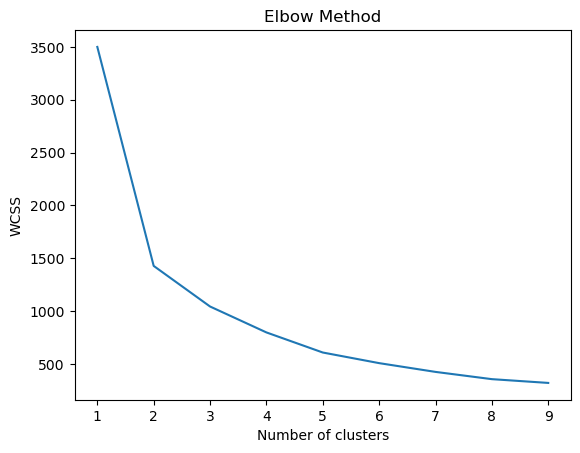

In [71]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
# Applying KMeans with the chosen number of clusters (assuming 3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Display the first few rows with clusters assigned
df[['User ID', 'Cluster']].head()

,User ID,Cluster
0,1,1
1,2,1
2,3,0
3,4,1
4,5,1


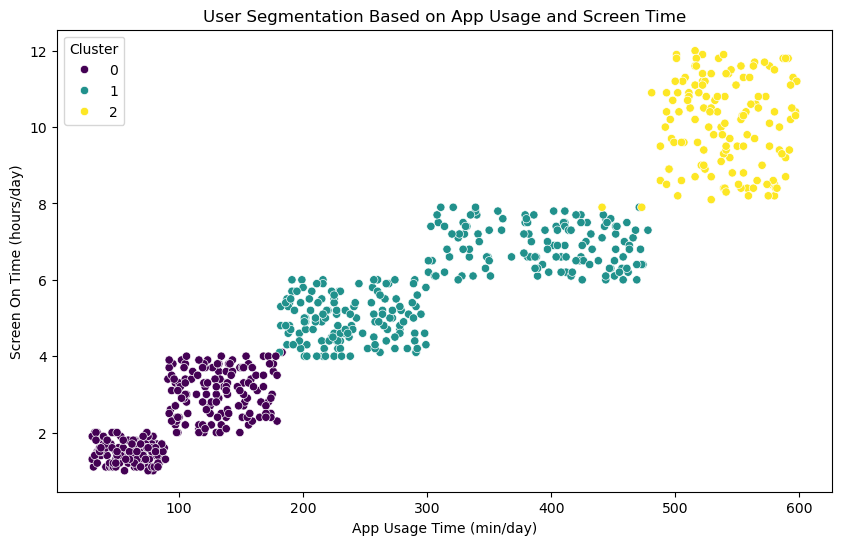

In [41]:
import seaborn as sns

# Visualizing the clusters using a scatter plot for two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['App Usage Time (min/day)'], y=df['Screen On Time (hours/day)'], 
                hue=df['Cluster'], palette='viridis')
plt.title('User Segmentation Based on App Usage and Screen Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen On Time (hours/day)')
plt.show()

In [42]:
# Selecting only numeric columns for aggregation
numeric_columns = df.select_dtypes(include='number').columns

# Grouping by 'Cluster' and calculating mean values for the numeric features
cluster_profiles = df.groupby('Cluster')[numeric_columns].mean()

# Display the cluster profiles to analyze the behaviors of each group
cluster_profiles

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Cluster
Cluster,,,,,,,,,
0,350.819788,97.770318,2.297880,678.879859,23.021201,332.724382,38.367491,1.522968,0.0
1,355.082437,313.885305,5.911111,1804.752688,59.799283,1022.010753,38.784946,3.491039,1.0
2,340.579710,540.195652,10.082609,2695.376812,88.971014,1967.521739,38.108696,4.985507,2.0


In [43]:
# Grouping by 'Cluster' and getting the most frequent (mode) non-numeric value
non_numeric_columns = df.select_dtypes(exclude='number').columns

# Apply mode to non-numeric columns
cluster_modes = df.groupby('Cluster')[non_numeric_columns].agg(lambda x: x.mode()[0])

# Display both numeric means and non-numeric modes
cluster_summary = pd.concat([cluster_profiles, cluster_modes], axis=1)

# Show the final cluster profiles with numeric and non-numeric info
cluster_summary

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Cluster,Device Model,Operating System,Gender
Cluster,,,,,,,,,,,,
0,350.819788,97.770318,2.297880,678.879859,23.021201,332.724382,38.367491,1.522968,0.0,Google Pixel 5,Android,Male
1,355.082437,313.885305,5.911111,1804.752688,59.799283,1022.010753,38.784946,3.491039,1.0,iPhone 12,Android,Female
2,340.579710,540.195652,10.082609,2695.376812,88.971014,1967.521739,38.108696,4.985507,2.0,iPhone 12,Android,Male


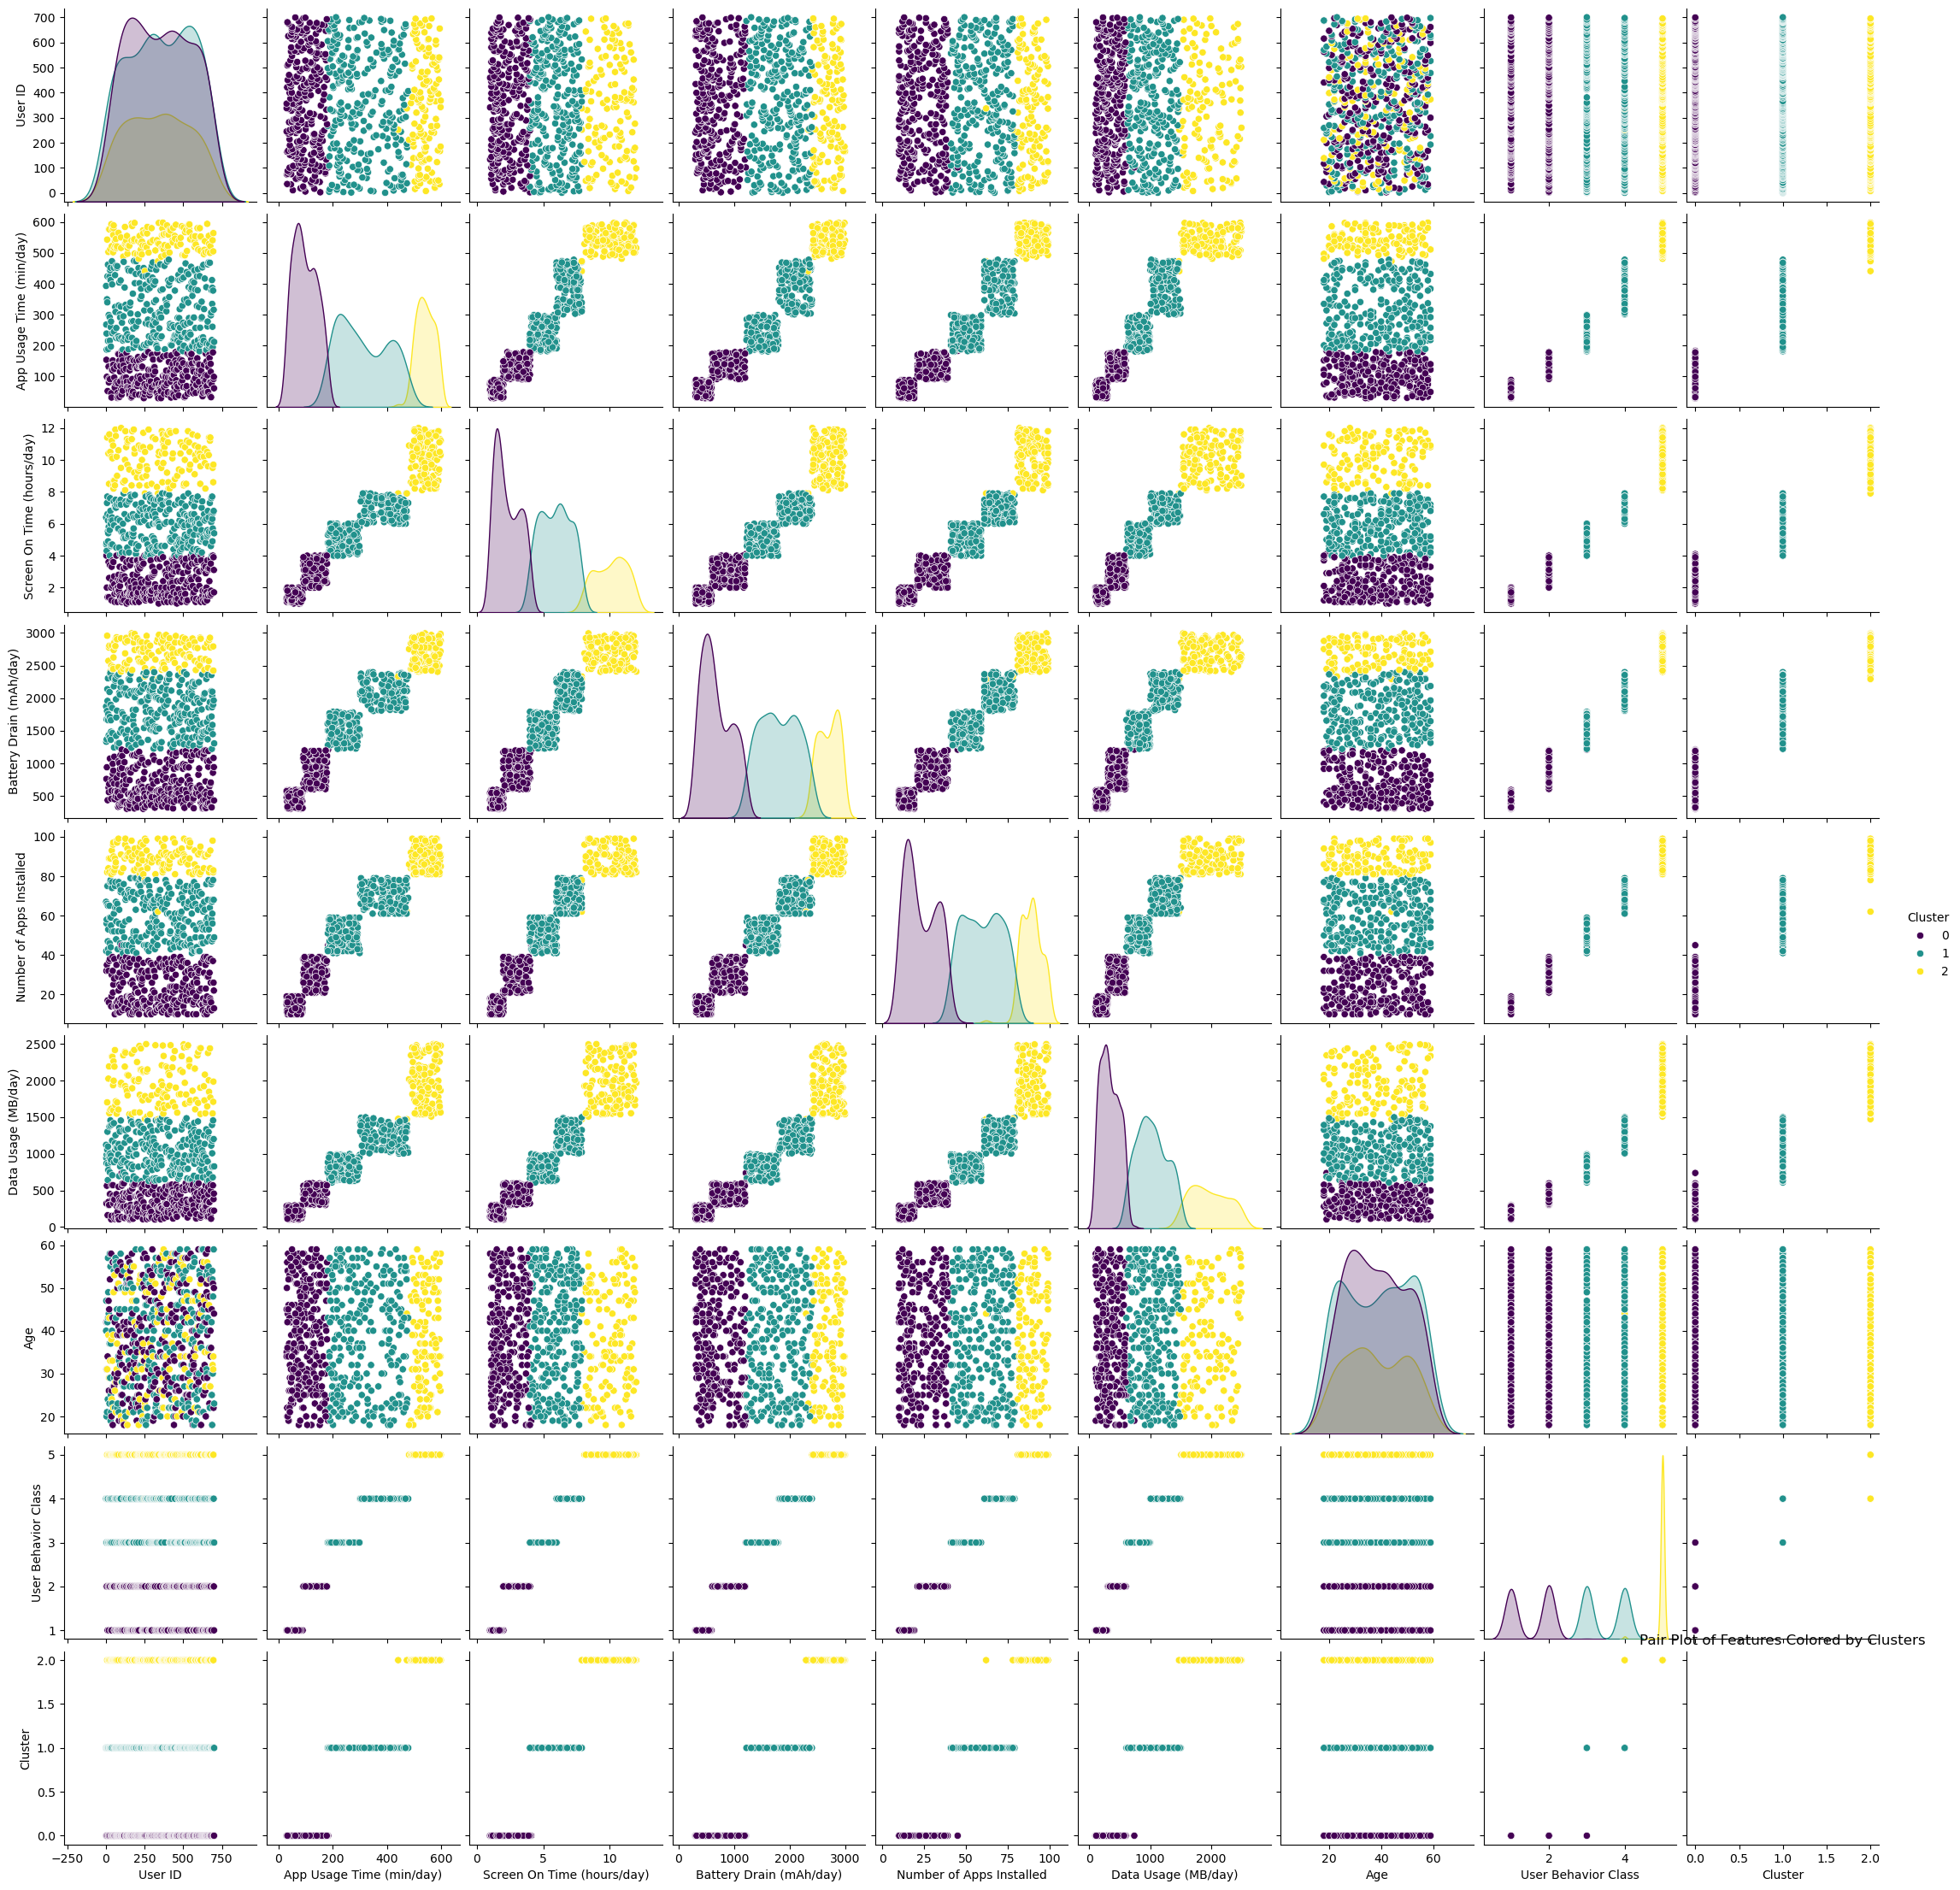

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to show relationships between features for each cluster
sns.pairplot(df, hue='Cluster', vars=numeric_columns, palette='viridis')
plt.title('Pair Plot of Features Colored by Clusters')
plt.show()

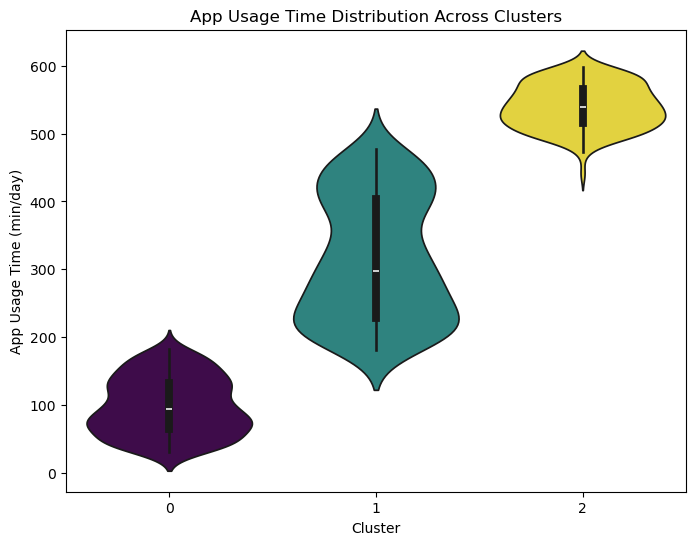

In [45]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cluster', y='App Usage Time (min/day)', data=df, hue='Cluster', palette='viridis', legend=False)
plt.title('App Usage Time Distribution Across Clusters')
plt.show()

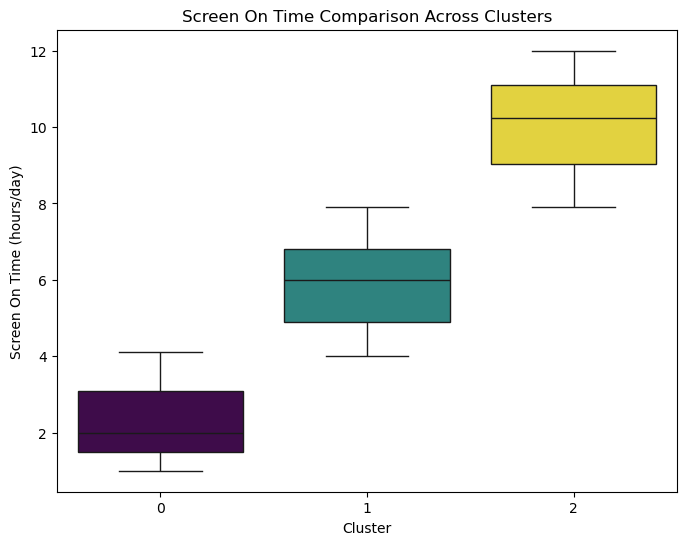

In [46]:
# Box plot to compare Screen On Time across clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Screen On Time (hours/day)', data=df, hue='Cluster', palette='viridis', legend=False)
plt.title('Screen On Time Comparison Across Clusters')
plt.show()

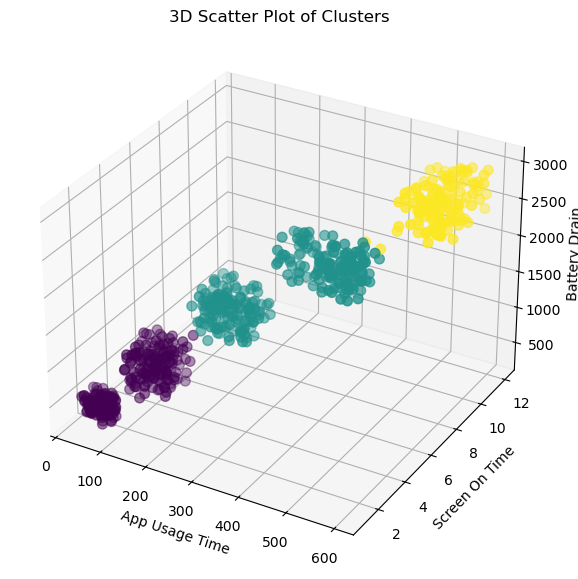

In [47]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot for 3 main features
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using 3 features to visualize the clusters in 3D
ax.scatter(df['App Usage Time (min/day)'], df['Screen On Time (hours/day)'], df['Battery Drain (mAh/day)'], 
           c=df['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('App Usage Time')
ax.set_ylabel('Screen On Time')
ax.set_zlabel('Battery Drain')
plt.title('3D Scatter Plot of Clusters')
plt.show()

In [48]:
# Prepare the features and target variable for prediction
X = df[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
          'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Age']]
y = df['User Behavior Class']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the split data
X_train.shape, X_test.shape

((490, 5), (210, 5))

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Confusion Matrix:
[[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]


In [50]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean():.4f}')

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000


In [51]:
# Get feature importances from the RandomForest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Display the feature importances
for feature, importance in zip(feature_names, importances):
    print(f'{feature}: {importance:.4f}')

App Usage Time (min/day): 0.2520
Screen On Time (hours/day): 0.1712
Battery Drain (mAh/day): 0.2729
Data Usage (MB/day): 0.3038
Age: 0.0001


In [52]:
# Step 1: Segment users by battery drain (low, medium, high)
# Define thresholds for battery drain levels (these can be adjusted)
bins = [0, 1000, 2000, 3000]  # Low: 0-1000, Medium: 1000-2000, High: 2000-3000
labels = ['Low Drain', 'Medium Drain', 'High Drain']
df['Battery Drain Level'] = pd.cut(df['Battery Drain (mAh/day)'], bins=bins, labels=labels)

# Step 2: Create personalized recommendations for each battery drain level
def recommend_battery_optimization(row):
    if row['Battery Drain Level'] == 'Low Drain':
        return 'Your battery usage is great! No major changes needed.'
    elif row['Battery Drain Level'] == 'Medium Drain':
        return 'Consider reducing app usage or screen on time to optimize battery life.'
    else:
        return 'High battery drain detected! Try reducing data usage and limiting screen time.'

# Apply the recommendation function to the dataset
df['Battery Optimization Recommendation'] = df.apply(recommend_battery_optimization, axis=1)

# Display sample recommendations
df[['Battery Drain (mAh/day)', 'Battery Drain Level', 'Battery Optimization Recommendation']].head()

,Battery Drain (mAh/day),Battery Drain Level,Battery Optimization Recommendation
0,1872,Medium Drain,Consider reducing app usage or screen on time ...
1,1331,Medium Drain,Consider reducing app usage or screen on time ...
2,761,Low Drain,Your battery usage is great! No major changes ...
3,1676,Medium Drain,Consider reducing app usage or screen on time ...
4,1367,Medium Drain,Consider reducing app usage or screen on time ...
